
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [77]:
#Load libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [194]:
#Load data in dataframe
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
#Find the average age of those who survived and those who did not
survived_df = df[df['Survived'] == 1]
not_survived_df = df[df['Survived'] == 0]

In [10]:
average_age_survived = survived_df['Age'].mean()
print('The average age of survivors is around', average_age_survived)

The average age of survivors is around 28.343689655172415


In [80]:
average_age_not_survived = not_survived_df['Age'].mean()
average_age_not_survived

30.62617924528302


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [11]:
#1. check is there is missing value inside column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 2. Which column has the most NaN values? How many cells in that column are empty?
column: Cabin 
NaN cell amt : 687

In [196]:
#3. Delete all rows where Embarked is empty
# df.dropna(inplace=True) ni kalau nak buang semua yang null, termasuk column2 lain, 
#jadi kita nak remove untuk bahagian embark sahaja, sebab drop embark yg kosong sebab tahu orang tu tak naik, tak terlibat
df = df.dropna(subset=['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.isnull().sum()   #before this embarked has 2 null, now 0

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
df.Cabin.sort_values(ascending=False)   #NAK CHECK ADA DAK NaN kat cabin

339      T
251     G6
10      G6
205     G6
394     G6
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: Cabin, Length: 889, dtype: object

In [ ]:
#Fill all empty cabins with ¯\(ツ)/¯
#Your code here 
#df.Cabin = df.Cabin.map(lambda cabin: '¯\(ツ)/¯' if cabin == 'np.nan' else int(cabin))
#'np.nan' ni string literal, not as a representation of missing values (NaN). so this code is kenot be used
#The conversion to an integer using int(cabin) would throw an error for non-numeric values, sebab cabin tu boleh jadi guna string? 
#df.Cabin

In [197]:
#4. Fill all empty cabins with ¯\(ツ)/¯ 
#fillna() method in pd. is used to fill missing (NaN) values in a DataFrame or Series with specified values.
# df['column name'].fillna('', inplace=True)
df['Cabin'].fillna('¯\(ツ)/¯', inplace=True)   #inplace =True will save the new data as the new df?
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [83]:
#Your code here
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


***1.There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.***

In [198]:
'''1. There are two columns that pertain to how many family members are on the boat for a given person. 
Create a new column called FamilyCount which will be the sum of those two columns.'''
#HOW TO ADD NEW COLUMN
#new column = sibsp + parch column
# df[]; new column = df[]+ df[] ; existing column
df['FamilyCount'] = df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


**2. Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.**

In [199]:
'''2. Reverends have a special title in their name. Create a column called 
IsReverend: 1 if they're a preacher, 0 if they're not.'''
#KEYWORD: HOW TO ADD NEW COLUMN USING PD, BUT WANT TO USE BOOLEAN FROM PREV DATAFRAME
#.str.contains('Rev'): The str.contains() if entry ada substring 'Rev'. 
#this method,bagi balekboolean Series;True if ada string tu
#The astype(int) method: to convert the boolean values (True and False) to integers (1 for True and 0 for False).
df['IsReverend'] = df['Name'].str.contains('Rev').astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [86]:
df['IsReverend'].value_counts()
#nak tengok how many of passenger ada Rev dalam nama dorang

IsReverend
0    883
1      6
Name: count, dtype: int64

In [28]:
pd.get_dummies 
#TAK PAHAM
#Convert categorical variable into dummy/indicator variables.
#maksudnya tukar categorical content dlm column yang cannot be used in Machine learning , to numerical so boleh di interpret
#Use pd.get_dummies() to convert categories inside the column into 1 and 0, ;as the C, S,Q is string

<function pandas.core.reshape.encoding.get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'>

In [ ]:
# variable = pd.get_dummies(Table_name['column'], prefix = 'prefix we want to use in new variable_dummies')
#pd.get_dummies(Tablename['column name'], prefix ='Column'), when coolumn contain single string as contents,eg: a,b,c?
#pd.get_dummies(df['Embarked'], prefix ='Embarked')


In [26]:
#Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. 
#These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
#use the same method dengan nak tambah IsReverend tadi
#df['Embarked_C']= df['Embarked'].str.contains('C').astype(int)
#df['Embarked_Q']= df['Embarked'].str.contains('Q').astype(int)
#df['Embarked_S']= df['Embarked'].str.contains('S').astype(int)
#df

**In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies**

i) Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column

ii) Do the same thing for Sex

iii)BONUS: Extract the title from everyone's name and create dummy columns

In [200]:
'''TAPI SOALAN SURUH GUNA pd.get_dummies, so'''

# pd.get_dummies() akan guna create column_dummies, dengan nama prefix yg kita pilih dan sambungan dengan content dlm column tu.
embarked_ = pd.get_dummies(df['Embarked'], prefix='Embarked')

# .concat(): Concatenate ni dia akan sambung column-dummies ke sebelah column asal, 
#axis=1 ni specify dia akan ditambah mengikut column, bukan row
# df = pd.concat([tablename, column_dummies], axis=1) 
df = pd.concat([df, embarked_], axis=1)
df.head(3)

# sekarang table kita; df[] akan ada column tambahan, iaitu column_dummies
# column ni , row dia akan isi 0 or 1, corresponding to the 'C', 'Q', and 'S' in original 'Embarked' column

# Optionally, you can save the modified DataFrame to a new CSV file
#df.to_csv('new_dataset.csv', index=False)


#BUT THE CONTENT INSIDE THE NEW COLUMN IS TRUE & FALSE, WE WANT IT IN 0 AND 1
#SOOOOOOOOO,KENA TAMBAH .astype(int)to convert dummy variables to integer type (1 and 0) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,False,False,True


In [201]:
#UNTUK ELAK BERTINDIH, DROP TABLE YG BARU CREATE TADI
#remove columns from dataframe or table
df = df.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S',], axis=1)
df.head(3)
#ke keaddan sebelum create dummies for column embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0


In [202]:
embarked_ = pd.get_dummies(df['Embarked'], prefix='Embarked').astype(int)
df = pd.concat([df, embarked_], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1


In [203]:
#create pd.get_dummies() for Sex
Sex_ = pd.get_dummies(df['Sex'], prefix='Sex').astype(int)

#tambah sex_dummies ke dalam df megikut column
df = pd.concat([df, Sex_ ], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0


**iii)BONUS: Extract the title from everyone's name and create dummy columns**

In [204]:
#title tu,mr,mrs la kan
#extract dulu title tu dari column Name guna .str.extract(), 
#dan buat column baru untuk title 
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.')

#(r'([A-Za-z]+)\.')
#r'' is a prefix indicating a raw string literal
# ([A-Za-z]+): bracket tu nak bagitau title tu digroup sekali as a word? (Mr)(Mrs)
# \.:  matches a period (.) character.
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,Mrs


In [205]:
# Create column_dummies for Title column
# column_dummies = pd.get_dummies(df['column', prefix= 'string kita nak samakan nama'])
#df['Title'] ni adalah indexingmethod for dataframe
title_dummies = pd.get_dummies(df['Title'], prefix='Title').astype(int)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, title_dummies], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0


In [206]:
#soalan bawah ada tanya bab captain, maybe check first if any of the title does sound right for the captain
df['Title_Sir'].value_counts()
#is sir for the captain?

Title_Sir
0    888
1      1
Name: count, dtype: int64

In [94]:
#Index a row from the column that we know has the True value such as this Title_sir column
df[df['Title_Sir'] == 1]
#nak tengokdetail utk Sir 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#planning to drop all these new column, but maybe not
#df = df.drop(['Title_Major','Title_Master','Title_Miss','Title_Mlle','Title_Mme', 'Title_Mr','Title_Mrs','Title_Ms', 'Title_Rev','Title_Sir',], axis=1)
#df

In [ ]:
#Your code here 

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [45]:
df.head(0)  #utk view column shj
#df.columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir


In [175]:
# 1. What was the survival rate overall?
#survived_df = df[df['Survived'] == 1]
#df['Survived'].value_counts()
#waittttt,if there are coumn for passengers and survived column ,maybeee
#kita takleh refer passenger id sebab , ada sorang passenger tak embark the titanic, sirefer the rownumber, which is df.shape[0]
# survival_rate = berapa survived kat survived column / total passenger
round(df['Survived'].sum() / df.shape[0], 6)

0.382452

In [176]:
df['Survived'].mean() #the same as percentage of survival

0.38245219347581555

2a. Which gender fared the worst? 


In [48]:
# Group by 'Gender' and calculate the mean fare for each gender
#df.groupby('Sex')['Fare'].mean()   #kita nak classify ikut sex, dan kita nak tau mean fare mengikut jenis sex.
df.groupby('Sex')['Fare'].mean().idxmax()  #.idxmax()to find the index (i.e., the gender) with the highest mean fare.

'female'

2b. What was their survival rate?


In [95]:
df['Sex_female'].value_counts()

Sex_female
0    577
1    312
Name: count, dtype: int64

In [110]:
df.groupby('Sex_female')['Survived'].sum() #nak tau berapa yg survived, berapa yg tak survive # kenapa tak tally?

Sex_female
0    109
1    231
Name: Survived, dtype: int64

In [108]:
round(df.groupby('Sex_female')['Survived'].sum() / df.shape[0], 6)  #kita nak tau survival rate dorang, sooo
#yang ni dia tak index sekali utk ambik female sahaja, NI DIA SEKALIKAN DENGAN BUKAN FEMALE

Sex_female
0    0.122610
1    0.259843
Name: Survived, dtype: float64

In [177]:
df.groupby('Sex_female')['Survived'].mean()  #mana satu survival rate? the one above, or this one?

Sex_female
0    0.188908
1    0.740385
Name: Survived, dtype: float64

In [126]:
# indexing, so only female are extracted 
female_df = df[df['Sex_female'] == 1]

# tablename['survived'].sum ,to know how many female do survive
#divide with total passenger
print('The survival rate for female passengers is', round(female_df['Survived'].sum() / df.shape[0], 6))


The survival rate for female passengers is 0.259843


3. What was the survival rate for each Pclass?

In [128]:
round(df.groupby('Pclass')['Survived'].sum() / df.shape[0], 6)

Pclass
1    0.150731
2    0.097863
3    0.133858
Name: Survived, dtype: float64

4. Did any reverends survive? How many?

In [137]:
#kalau guna groupby
(df.groupby('IsReverend')['Survived'].sum() / df.groupby('IsReverend').size()).round(6)
#is there anywayor anything to add to the code,so that the output onlyhave percentage of survived reverend,like the above code?

IsReverend
0    0.385051
1    0.000000
dtype: float64

In [132]:
# indexing, so only name with rev are extracted 
Rev_df = df[df['IsReverend'] == 1]

# tablename['survived'].sum ,to know how many female do survive
#divide with total passenger
print('There are', round(Rev_df['Survived'].sum() / df.shape[0], 6), 'of reverends survive')

There are 0.0 of reverends survive


5. What is the survival rate for cabins marked ¯\(ツ)/¯

In [155]:
#df['Cabin']
Cabin_index = df[df['Cabin'] == '¯\(ツ)/¯']
#Cabin_index.groupby('Survived').sum() / df.shape[0] - unsupported operand type(s) for /: 'str' and 'int'
#df.groupby(Cabin_index)['Survived'].sum() /df.shape[0] - this does not work bcos it is not 1 dimensional?
Cabin_index['Survived'].sum() / df.shape[0]

0.23172103487064116

6.What is the survival rate for people whose Age is empty?

In [166]:
# how to know counts for isnull in age column
#(df['Age'].isnull().sum()) / df.shape[0]
print('There are', (df['Age'].isnull().sum()) / df.shape[0], 'of survivors with no information on their age')
#round(df.groupby('Age')['Survived'].sum() / df.shape[0], 6)

There are 0.19910011248593926 of survivors with no information on their age


In [163]:
df.groupby('Survived')['Age'].apply(lambda x: x.isnull().sum()) / df.shape[0]
#why different in rate of survival for the survived of isnull age ?

Survived
0    0.140607
1    0.058493
Name: Age, dtype: float64

7. What is the survival rate for each port of embarkation?

In [168]:
df.groupby('Embarked')['Survived'].sum() / df.shape[0]

Embarked
C    0.104612
Q    0.033746
S    0.244094
Name: Survived, dtype: float64

8. What is the survival rate for children (under 12) in each Pclass?

In [172]:
#df.groupby('Pclass')['Survived'].sum()
child_df = df[df['Age'] < 12]
child_df.groupby('Pclass')['Survived'].sum() 
#filter children < 12, and then filter again to each class and then count the sum for the survived of children in in pclass


Pclass
1     3
2    17
3    19
Name: Survived, dtype: int64

In [174]:
child_df.groupby('Pclass')['Survived'].mean() 

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [173]:
print('The survival rate for children (under 12) in each Pclass:')
child_df.groupby('Pclass')['Survived'].sum() / df.shape[0]

The survival rate for children (under 12) in each Pclass:


Pclass
1    0.003375
2    0.019123
3    0.021372
Name: Survived, dtype: float64

9. Did the captain of the ship survive? Is he on the list?

In [294]:
#indexing df
#df[df['Name'] == Smith]   DOESNT WORK HAHAHA
df[df['Name'].str.contains('Capt')]  #okkk, maybe not, just search for capt, method dari IsReverend question 
#So yeas, Captain is on the list

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,TravelingAlone,AgeGroup,AgeRange
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,...,0,0,0,0,0,0,0,False,"[70, 80)","(60, 70]"


When used inside an f-string, {} denotes a placeholder where the value of the expression inside will be inserted.

In this case, row['Name'] accesses the value in the 'Name' column of the current row.

So, {row['Name']} in the f-string will be replaced with the value of the 'Name' column for each row as the loop iterates through the DataFrame.

print(f''): f-string, or formatted string literal, is a feature introduced in Python 3.6 that allows you to embed expressions inside string literals.

In [298]:
captain_df =df[df['Name'].str.contains('Capt')]  #kita nak extract row yang contain nama capt, mcm di atas ^
#utk check column from row yang kita execute kat atas ni^, use row['Column_name']

#for index, row in df.iterrows():  memang come in pair for index, row wehn to iterate row
#    print(index, row)
if not captain_df.empty: #check if the row empty or not, if empty , terus ke else argument
    for index, row in captain_df.iterrows(): # .iterrows: iterate row, mkasud nya loop to each row yg contain nama captain
        print(f"Survival status of {row['Name']}: {'survived' if row['Survived'] == 1 else 'not survived'}") 
        #print(f"Survival status of ")
        #print(f"Survival status of {x}: {y}")  {} inside f-string bleh letak method segala
        #{x} : nak indexing Name from row kita specify dari variable captain_df
        #{y}: nak index survive or not using if else ==1 dari row yg kita specifiy kat variable captain_df
else:
    print("No records found for individuals with 'Capt' in their name.")

Survival status of Crosby, Capt. Edward Gifford: not survived


10. Of all the people that died, who had the most expensive ticket? How much did it cost?


In [185]:
#not_survived_df variable is define at the top already
not_survived_df['Fare'].max()

263.0

In [303]:
#what if
#not_survived_df.groupby['Name'](Fare).max()   #wronggggg arrangement
not_survived_df.groupby('Name')['Fare'].max()   #so yang ni pisah fare and name? but max ni maksudnya?

Name
Abbing, Mr. Anthony                 7.5500
Abbott, Mr. Rossmore Edward        20.2500
Abelson, Mr. Samuel                24.0000
Adahl, Mr. Mauritz Nils Martin      7.2500
Adams, Mr. John                     8.0500
                                    ...   
Zimmerman, Mr. Leo                  7.8750
de Pelsmaeker, Mr. Alfons           9.5000
del Carlo, Mr. Sebastiano          27.7208
van Billiard, Mr. Austin Blyler    14.5000
van Melkebeke, Mr. Philemon         9.5000
Name: Fare, Length: 549, dtype: float64

In [307]:
'''the name with the highest fare (not_survived_df.groupby('Name')['Fare'].max().idxmax()) or '''

not_survived_df.groupby('Name')['Fare'].max().idxmax()  #oouhhhhh, so method ni just execute the name yg kita mau asingkan

#print(not_survived_df['Name'], 'had the most expensive tickets of', not_survived_df['Fare'] )

'Fortune, Mr. Charles Alexander'

In [308]:
'''the entire row of the passenger with the highest fare (not_survived_df.loc[not_survived_df['Fare'].idxmax()])'''
Row_with_Max_Fare = not_survived_df.loc[not_survived_df['Fare'].idxmax()]  #.loc[what are u looking for] locate fare 4 not survived
#kena practice lagi soalan yg guna df.loc[]
#idxmax() nak index nilai tertinggi utk fare 
#apa beza dengan index cara biasa????
#not_survived_df variable dah define kat atassssss sana
Row_with_Max_Fare  #utk call out senang
#from this kita boleh extract the 'Name' and 'Fare', by creating variable for this

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                      19.0
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                    263.0
Cabin                             C23 C25 C27
Embarked                                    S
Name: 27, dtype: object

In [309]:
#indexing the name and fare
print(Row_with_Max_Fare['Name'], 'had the most expensive tickets of', Row_with_Max_Fare['Fare'] )

Fortune, Mr. Charles Alexander had the most expensive tickets of 263.0


11. Does having family on the boat help or hurt your chances of survival?

In [218]:
df.groupby('TravelingAlone')['Survived'].sum() / df.shape[0]  #mana satu survival rate?

TravelingAlone
False    0.201350
True     0.181102
Name: Survived, dtype: float64

In [220]:
# variable utk family count
df['FamilyCount'] 

# Determine whether each passenger was traveling alone or with family
df['TravelingAlone'] = df['FamilyCount'] == 0

# Calculate survival rates for passengers traveling alone and those traveling with family
survival_rates = df.groupby('TravelingAlone')['Survived'].mean()
survival_rates
#kalau false, maksudnya family, 
#kalau true , maksudnya alone

TravelingAlone
False    0.505650
True     0.300935
Name: Survived, dtype: float64

In [221]:
survival_rates_ = df.groupby('FamilyCount')['Survived'].mean()  #df.groupby('index')['value'].mean()
survival_rates_ #why this come out different than above

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [222]:
survival_rates_.mean()  # ni apapulak eh, just randomly want to try and see the output

0.31399954264173613

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
sum_male_survived = df.groupby('Sex_male')['Survived'].sum()
sum_male_survived 

Sex_male
0    231
1    109
Name: Survived, dtype: int64

TypeError: only length-1 arrays can be converted to Python scalars

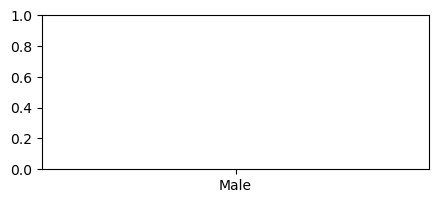

In [243]:
#kekalkan this code as note for future to avoide mistake
#Survive by gender
sum_male_survived = df.groupby('Sex_male')['Survived'].sum()
sum_female_survived = df.groupby('Sex_female')['Survived'].sum()

plt.figure(figsize=(5,2))  #(width, height?)

# Create a bar chart.
# plt.bar() will create a vertical bar chart.
plt.bar(['Male', 'Female'], # We have to specify our X labels/location.
        [sum_male_survived, sum_female_survived]) # We have to specify the Y height.
#plt.bar must be value, the height
# 2. Add a title and show the plot.
plt.title('Male vs Female Surviving Titanic Shipwreck', {'fontsize': 9});


#WHY DOES NOT WORK????
'''The issue you're encountering is due to passing arrays (sum_male_survived and sum_female_survived) directly 
as y-values to plt.bar(). 
Instead, you should pass scalar values representing the height of the bars for each category.

SO BASIKELI, NO VALUE FOR Y, BCOS FROM THE OUTPUT ABOVE, IT DOESNT DIFFERENTIATE BTWN 0 AND 1,SO THE SUM DOES NOT COME IN ONE VALUE??'''

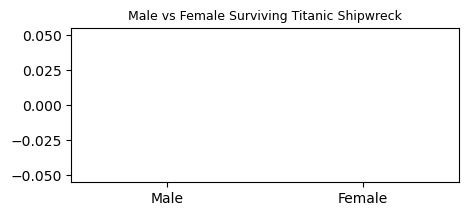

In [323]:
#kekalkan this code as note for future to avoide mistake
sum_male_survived = (df['Sex'] == 'Male').sum()
sum_female_survived = (df['Sex'] == 'Female').sum()

plt.figure(figsize=(5,2))  #(width, height?)

# Create a bar chart.
# plt.bar() will create a vertical bar chart.
plt.bar(['Male', 'Female'], # We have to specify our X labels/location.
        [sum_male_survived, sum_female_survived]) # We have to specify the Y height.
#plt.bar must be value, the height
# 2. Add a title and show the plot.
plt.title('Male vs Female Surviving Titanic Shipwreck', {'fontsize': 9});
#where is the value now??? ahhhhhhh same because it does not specify value for the survived itself, just sex

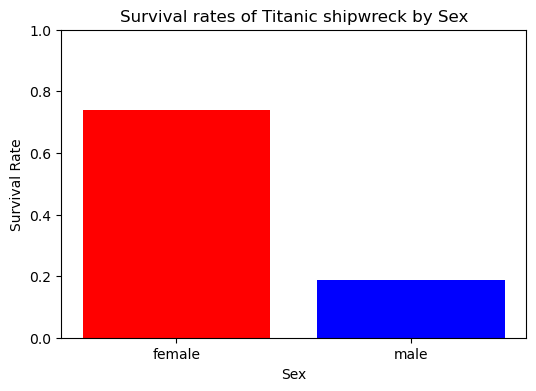

In [260]:
#survival based on gender
survival_rates = df.groupby('Sex')['Survived'].mean()      #so basically, they sex we choose
#survival_rates = df.groupby('Index')['Value'].mean()    index nanti akan separate accordngly two the class;M or F

'''Sex' is the grouping key or index in this context. It's the column name based on which the DataFrame df is being grouped.
['Survived'] is the column from which the values are aggregated during the grouping operation. 
In this case, you're calculating the mean of the 'Survived' column for each group defined by the values in the 'Sex' column.'''

# for plot
plt.figure(figsize=(6, 4))  #jom cari cara tukar colour utk bar
plt.bar(survival_rates.index, survival_rates.values, color=['red', 'blue']) #what if use rgb code? but tak accurate la colour, so no need
#rgb code always btwn 0-1, so add .before each number
plt.title('Survival rates of Titanic shipwreck by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

plt.ylim(0, 1)  # Set y-axis limit to ensure visibility of survival rates   #bila tak set yang ni, canvas jadi mcm stretch
plt.show()    #bila tak type yg ni,about the canvas, naik Text(0, 0.5, 'Survival Rate'), why?

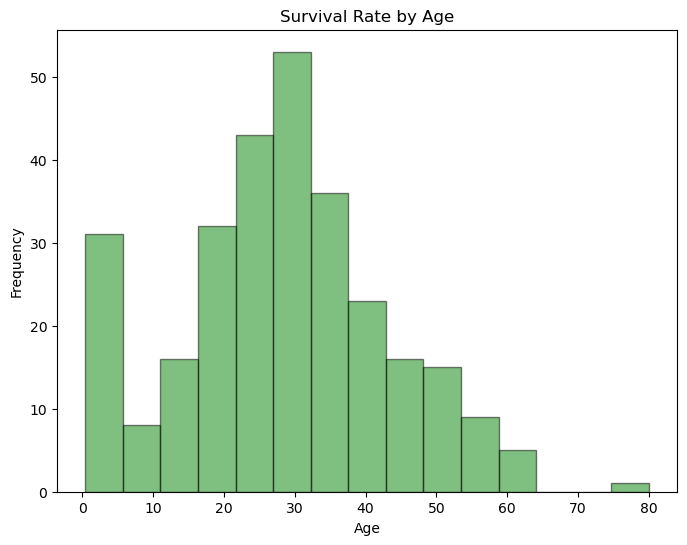

In [319]:
# Plotting histogram
plt.figure(figsize=(8, 6))
#plt.hist(df['Age'], bins=bins, alpha=0.5, label='Total Passengers', color='blue', edgecolor='black')   #if mau compare dgn total
plt.hist(df[df['Survived'] == 1]['Age'], bins=15, alpha=0.5, color='green', edgecolor='black') #tmbh label='Survived' if nak comapre dgn total
#df[df['Survived'] == 1]['Age'] utk filter row yang survived equal 1, dan lepas tu extract only age yg ada dalam row yg dah difilter dari survive
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.legend()  #if nak tambah legend utk figure 
plt.show()

C:\Users\najib\AppData\Local\Temp\ipykernel_12496\2239174765.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby('AgeGroup')['Survived'].mean().reset_index()


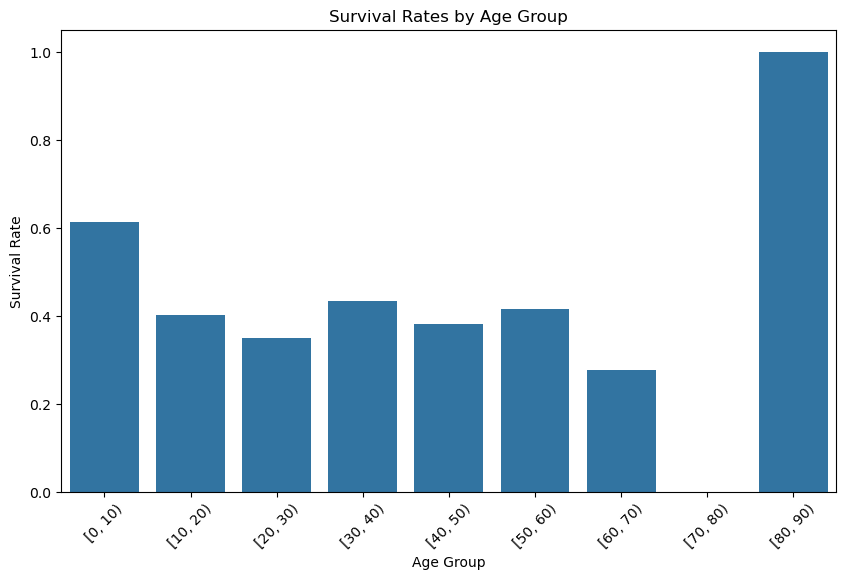

In [239]:
# Define age groups (bins) based on specific ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# Bin ages into age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, right=False)

# Calculate survival rates by age group
survival_rates = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=survival_rates)
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\najib\AppData\Local\Temp\ipykernel_12496\2623348716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette={'male': 'blue', 'female': 'pink'}, ax=axes[0])   #if nak tukar colour?


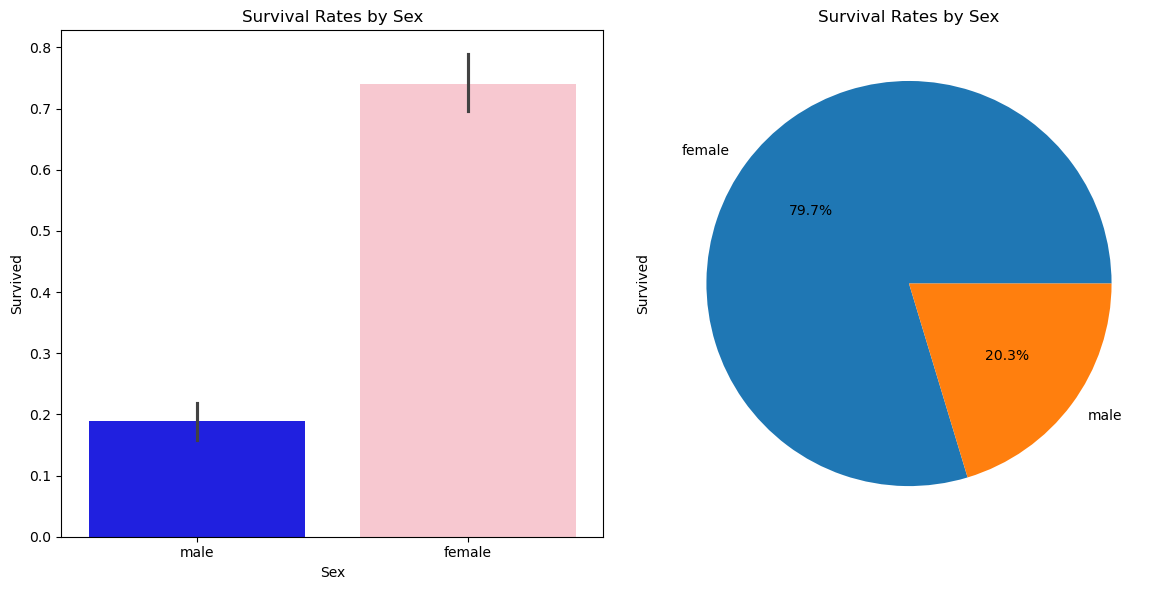

In [322]:
#NAK BUAT FIGURE GUNA SNS,LOOK MUCH EASIER THAN PLT.
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) #subplot; buat plot, mcm utk tanam pokok
#create figure(fig) and set of subplots(axes) arrange in grid layout; 1 row and 2 column       


# Bar plot showing survival rates by sex
sns.barplot(x='Sex', y='Survived', data=df, palette={'male': 'blue', 'female': 'pink'}, ax=axes[0])   #if nak tukar colour?
axes[0].set_title('Survival Rates by Sex')    #if ada dua nrows=2, axes[0,0]

# Pie chart showing survival rates by sex
df.groupby('Sex')['Survived'].mean().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
#autopct='%1.1f%%':percentage labels displayed on pie wedge formatted as floating-point numbers with one decimal place followed by a percent sign (%).
axes[1].set_title('Survival Rates by Sex')  #axes[1] : title utk axis kedua, sebelah kana utk pie

# Adjust layout???
plt.tight_layout()

# utk show figure
plt.show()
#warning:
#Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

#sns.barplot(x='Sex', y='Survived', data=df, hue='Sex', palette={'Male': 'blue', 'Female': 'pink'}, ax=axes, legend=False)  tapi tak jalan juga pon?
#sabreena shares her code, for sns.

In [ ]:
#Your code here 